<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/ClassficationMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [4]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [5]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (398, 30)
Shape of X_test=> (171, 30)
Shape of Y_train=> (398,)
Shape of Y_test=> (171,)


In [16]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 21)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)

Training Set Evaluation Accuracy score=> 1.0
Testing Set Evaluation Accuracy score=> 0.9005847953216374


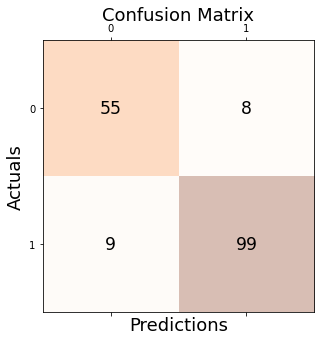

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

True Positive (TP): True positive represents the value of correct predictions of positives out of actual positive cases. Out of ? actual positive, ? is correctly predicted positive. Thus, the value of True Positive is ?.

False Positive (FP): False positive represents the value of incorrect positive predictions. This value represents the number of negatives (out of ?) which gets falsely predicted as positive. Out of ? actual negative, ? is falsely predicted as positive. Thus, the value of False Positive is ?.

True Negative (TN): True negative represents the value of correct predictions of negatives out of actual negative cases. Out of ? actual negative, ? is correctly predicted negative. Thus, the value of True Negative is ?.

False Negative (FN): False negative represents the value of incorrect negative predictions. This value represents the number of positives (out of ?) which gets falsely predicted as negative. Out of ? actual positive, ? is falsely predicted as negative. Thus, the value of False Negative is ?.

In [19]:
print(conf_matrix)
print(sum(y_test))
print(sum(dt_pred_test))

[[55  8]
 [ 9 99]]
108
107


In [20]:
from sklearn.metrics import accuracy_score
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation Accuracy score=>',accuracy_score(y_train,dt_pred_train))
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation Accuracy score=>',accuracy_score(y_test,dt_pred_test))

Training Set Evaluation Accuracy score=> 1.0
Testing Set Evaluation Accuracy score=> 0.9005847953216374


In [21]:
#Calculate Accuracy Score on test data

0.9005847953216374


Precision: Model precision score represents the model’s ability to correctly predict the positives out of all the positive predictions it made. The precision score is a useful measure of the success of prediction when the classes are very imbalanced. Mathematically, it represents the ratio of true positive to the sum of true positive and false positive.

Precision Score = TP / (FP + TP)

From the above formula, you could notice that the value of false-positive would impact the precision score. Thus, while building predictive models, you may choose to focus appropriately to build models with lower false positives if a high precision score is important for the business requirements.

In [27]:
from sklearn.metrics import precision_score
print('Precision: ' + str(precision_score(y_test, dt_pred_test)))

Precision: 0.9252336448598131


In [25]:
#Calculate Precision Score on test data

0.9252336448598131


Recall score measures how good our machine learning model is at identifying all actual positives out of all positives that exist within a dataset. The higher the recall score, the better the machine learning model is at identifying both positive and negative examples. Recall score is a useful measure of success of prediction when the classes are very imbalanced.  Mathematically, it represents the ratio of true positive to the sum of true positive and false negative.

Recall Score = TP / (FN + TP)

From the above formula, you could notice that the value of false-negative would impact the recall score. Thus, while building predictive models, you may choose to focus appropriately to build models with lower false negatives if a high recall score is important for the business requirements.

In [28]:
from sklearn.metrics import recall_score
print('Recall: ' + str(recall_score(y_test, dt_pred_test)))

Recall: 0.9166666666666666


In [ ]:
#Calculate Recall Score on test data

Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). It’s often used as a single value that provides high-level information about the model’s output quality. This is a useful measure of the model in the scenarios where one tries to optimize either of precision or recall score and as a result, the model performance suffers. 

F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

In [29]:
from sklearn.metrics import  f1_score
print('F1-Score: ' + str(f1_score(y_test, dt_pred_test)))

F1-Score: 0.9209302325581395


In [30]:
#Calculate F1-Score on test data


0.9209302325581395

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.895


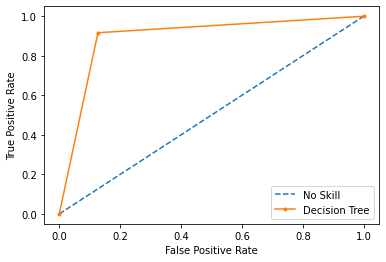

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [35]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 21)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation Accuracy score=>',accuracy_score(y_train,rfc_pred_train))
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation Accuracy score=>',accuracy_score(y_test,rfc_pred_test))

Training Set Evaluation Accuracy score=> 1.0
Testing Set Evaluation Accuracy score=> 0.9415204678362573


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.979


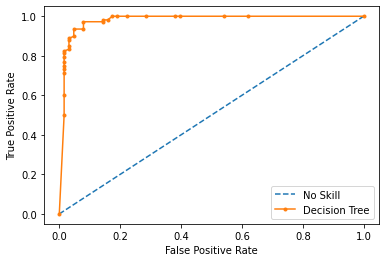

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.895
Random Forest: ROC AUC=0.979


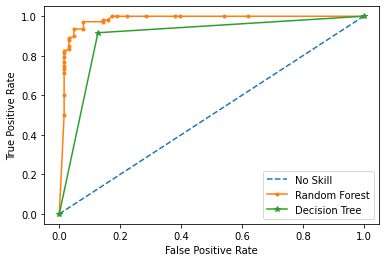

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = rfc.predict_proba(X_test)
lr_probs1 = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
pyplot.plot(lr_fpr1, lr_tpr1, marker='*', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()